In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
stocks = input("Enter the code of the stack: ")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stack: GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,843.200012,843.200012,843.200012,834.900024,4
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4


In [3]:
data.shape

(3255, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3255 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3255 non-null   float64
 1   High    3255 non-null   float64
 2   Low     3255 non-null   float64
 3   Close   3255 non-null   float64
 4   Volume  3255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 152.6 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3255.000000,3255.000000,3255.000000,3255.000000,3255.000000
mean,1316.159816,1323.292996,1308.347497,1315.899631,5542.007680
std,262.677504,263.982520,261.225100,262.713551,29509.825257
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1183.250000,1189.200012,1176.349976,1183.450012,41.500000
50%,1282.599976,1287.300049,1278.000000,1282.500000,138.000000
75%,1486.049988,1491.549988,1477.100037,1483.349976,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


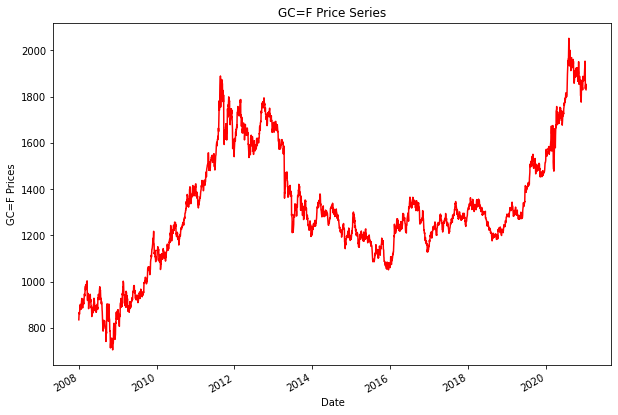

In [6]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel('{} Prices'.format(stocks))
plt.title('{} Price Series'.format(stocks))
plt.show()

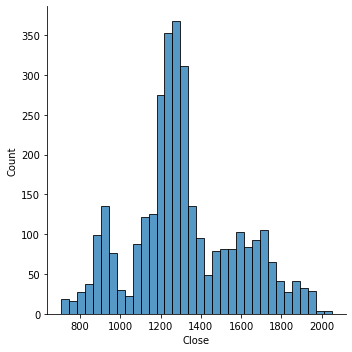

In [7]:
sns.displot(data['Close'])

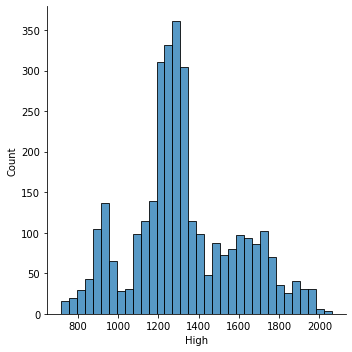

In [8]:
sns.displot(data['High'])

In [9]:
# Conclusions
# It is non linear.
# Linear, Logis, Regularized, SVM

X=data.drop('Close', axis=1)
Y=data['Close']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2604, 4) (651, 4) (2604,) (651,)


In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred1 = lr.predict(X_test)
pred1

array([1223.19608754, 1462.14877539, 1172.28237937, 1370.6182366 ,
        934.12363108, 1216.87097755, 1324.81607016, 1208.63152272,
       1319.75960204, 1122.06312357, 1056.00357204, 1190.98865588,
       1197.4627865 , 1163.4596951 , 1694.37782965, 1164.03287553,
        920.1483    , 1750.39684246, 1072.7336427 , 1850.42455768,
       1331.61658097, 1647.57888077, 1938.07910134, 1350.73084822,
       1551.38444451,  898.93877774, 1672.55546118, 1163.44760878,
       1735.52666887, 1376.45980342, 1231.77092346, 1790.3187491 ,
       1327.25049503,  868.68783016, 1099.51453116, 1293.47722468,
       1340.5977834 , 1710.25157629, 1129.60255973, 1488.26584207,
       1438.36241185, 1321.91485631, 1227.19383887, 1607.49340271,
       1531.88673656, 1317.15701025, 1278.78313315, 1558.64141449,
       1420.88691611, 1335.46420124, 1271.8270204 , 1351.77115791,
       1325.55512899, 1325.36648828, 1294.41295588,  868.3743405 ,
       1891.04204222, 1812.43162789, 1286.07637171,  902.34843

In [11]:
Y_test

Date
2018-11-08    1222.900024
2013-04-26    1453.599976
2015-06-24    1172.599976
2013-06-11    1377.000000
2009-03-13     929.799988
                 ...     
2016-08-01    1351.400024
2009-10-23    1055.599976
2015-06-11    1179.900024
2010-11-10    1399.099976
2012-07-20    1582.500000
Name: Close, Length: 651, dtype: float64

In [12]:
#MSE = Mean Squared
#RMSE = root mean square error
# r2_square --->1.0 # good model

from sklearn.metrics import mean_squared_error, r2_score
def calculate_metrics(Y_test, Y_pred):
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2 Score: ', r2)
calculate_metrics(Y_test, pred1)

MSE:  32.00549655296971
RMSE:  5.657340059866448
R2 Score:  0.9995320882760993


In [13]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, Y_train)
rg = Ridge().fit(X_train, Y_train)

la_p = la.predict(X_test)
ri_p = rg.predict(X_test)

calculate_metrics(Y_test, la_p)

MSE:  51.805307958749225
RMSE:  7.197590427271423
R2 Score:  0.9992426203757199


c:\users\rsale\python\py396\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.607e+04, tolerance: 1.800e+04
  model = cd_fast.enet_coordinate_descent(


In [14]:
calculate_metrics(Y_test, ri_p)

MSE:  32.00554746147135
RMSE:  5.6573445591965985
R2 Score:  0.9995320875318308


In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid= {'C': [0.1, 1,10, 100, 1000], 
             'gamma': [1,0.1, 0.01, 0.001, 0.0001], 
             'kernel': ['rbf']}
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   1.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   1.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   1.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   1.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.030 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.033 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.014 total time=   1.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   1.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.007 total time=   1.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.030 total time=   1.1s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.033 total time=   1.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   1.1s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.005 total time=   0.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   1.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   1.2s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.018 total time=   1.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.019 total time=   1.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.022 total time=   1.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.020 total time=   1.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.027 total time=   1.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.243 total time=   1.7s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.257 total time=   1.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.245 total time=   1.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [16]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, Y_train)
svr_pred = svr.predict(X_test)

In [17]:
import joblib
joblib.dump(rg, 'stock.pkl')
ridge_from_joblib = model = joblib.load('stock.pkl')